Problem Statement -A pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model

Business Objectives - The primary business objective of the pharmaceuticals manufacturing company is to evaluate the effectiveness of a new medicine intended for the treatment of heart diseases. By analyzing patient data, the company aims to identify distinct patient segments based on age groups and other relevant factors that influence the response to the medication. Understanding these segments will enable the company to optimize the medicine’s usage, target specific patient demographics more effectively, and potentially tailor the treatment to meet the unique needs of different patient groups. 

Minimize -risks associated with the treatment by identifying high-risk groups that may require special attention. Ultimately, the insights derived from this analysis.

Maximize - enhancing the accuracy and effectiveness of patient segmentation.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [134]:
pharma= pd.read_csv("D:/Documents/Datasets/heart_disease.csv")
pharma

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [136]:
pharma.shape

(303, 14)

In [138]:
pharma.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [140]:
pharma.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
pharma.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [144]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [146]:
pharma.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [148]:
pharma.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [150]:
pharma.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

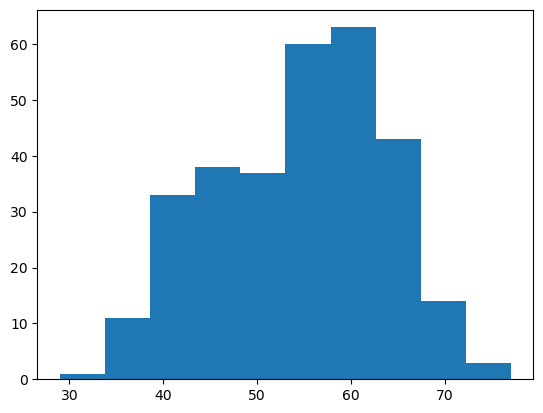

In [152]:
plt.hist(data=pharma,x="age")

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

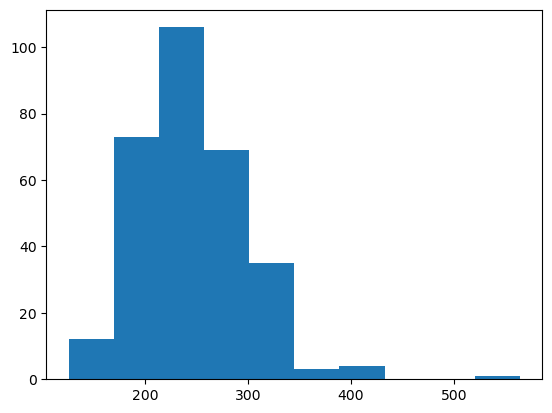

In [153]:
plt.hist(data=pharma,x="chol")

(array([  2.,   0.,   0.,  18.,   0.,   0., 166.,   0.,   0., 117.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

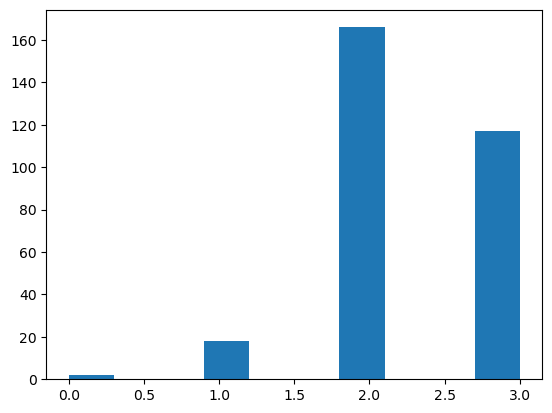

In [155]:
plt.hist(data=pharma,x="thal")

(array([143.,   0.,   0.,  50.,   0.,   0.,  87.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

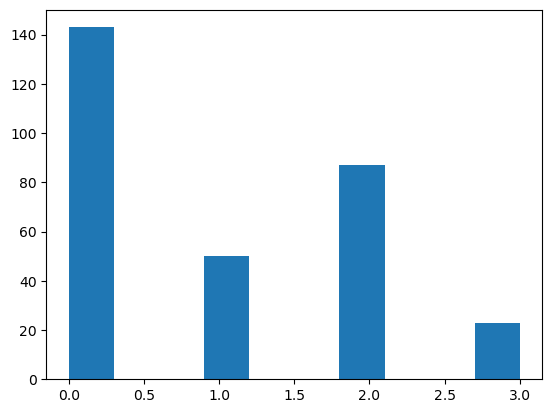

In [157]:
plt.hist(data=pharma,x="cp")

In [159]:
# the scale difference among the columns,which we have to remove by using normalization 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [160]:
# Apply normalization function
df_norm=norm_func(pharma.iloc[:,:])
SST=[]
k=list(range(2,14))

In [164]:
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    SST.append(kmeans.inertia_)
SST

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[332.4311088029971,
 251.84677757750646,
 214.62294182088635,
 201.53133962104863,
 187.31205606054468,
 187.9449101605002,
 167.47610079760545,
 155.17232744590154,
 150.64492059216764,
 149.12597732642624,
 147.81372139534932,
 139.0801794350689]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clust
0    161
1     80
2     62
Name: count, dtype: int64

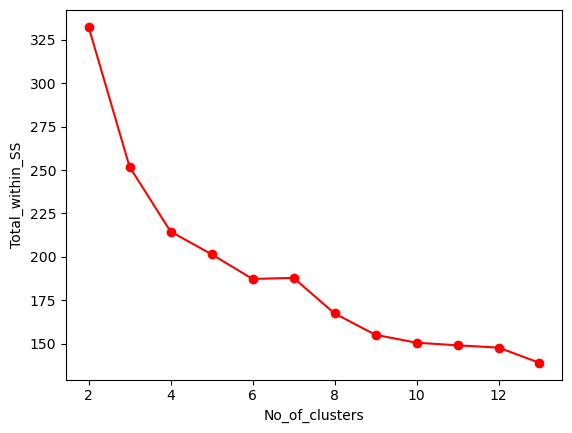

In [165]:
plt.plot(k,SST,'ro-')
plt.xlabel("No_of_clusters")
plt.ylabel("Total_within_SS")

model=KMeans(n_clusters=3)
model.fit(df_norm)
model.labels_
mb=pd.Series(model.labels_)
pharma['clust']=mb

pharma=pharma.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
pharma.clust.value_counts()

In [168]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pharma.data = pharma.iloc[:,1:]

normal = scale(pharma.data)
normal

pca = PCA(n_components = 6)
pca_values = pca.fit_transform(normal)
 
var = pca.explained_variance_ratio_
var

C:\Users\HP\AppData\Local\Temp\ipykernel_3120\3992881562.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pharma.data = pharma.iloc[:,1:]


array([0.23581966, 0.11229748, 0.08800207, 0.08618849, 0.07300207,
       0.06929774])

array([[-0.05173911,  2.62402204,  0.99005387,  3.47932755,  0.36277276,
         1.69583645],
       [-0.81744059, -0.73037458, -0.23592842,  2.76754545,  2.25840401,
        -0.80841408],
       [-2.05759932, -0.03909845, -0.51983865,  0.08119845,  0.86041578,
         0.75278259],
       ...,
       [ 2.68177206,  0.59301894,  1.791015  ,  1.30026165, -1.33135083,
        -1.2016605 ],
       [ 2.17085793, -2.16699205, -0.08151565,  0.89024401, -1.17744449,
        -0.34677011],
       [-0.36575966,  0.78791608, -0.39585992, -0.42187774,  0.203408  ,
         0.56128268]])

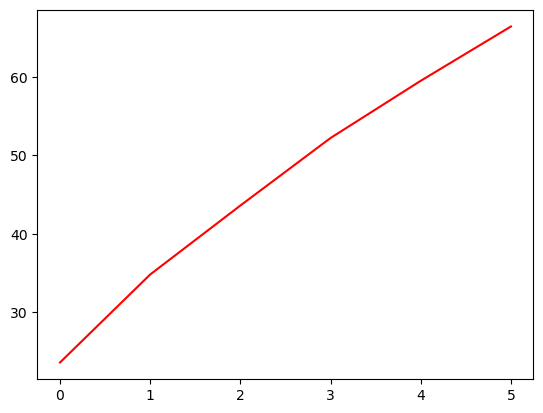

In [170]:
pca.components_
pca.components_[0]

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

# PCA scores
pca_values

In [172]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([pharma.clust, pca_data.iloc[:, 0:3]], axis = 1)

final1=final.iloc[:,1:]
# Now let us apply K-means to PCA converted final1
SST=[]
k=list(range(2,14))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(final1)
    SST.append(kmeans.inertia_)
SST


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[1098.4696076161545,
 871.0613933563268,
 713.8089233272789,
 611.4325502511954,
 547.1098002194124,
 468.85956819505486,
 427.4447221808056,
 429.94782816839506,
 367.441420588456,
 349.23651512765383,
 326.11767762366543,
 307.9752448947553]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


clust1
1    112
2    111
0     80
Name: count, dtype: int64

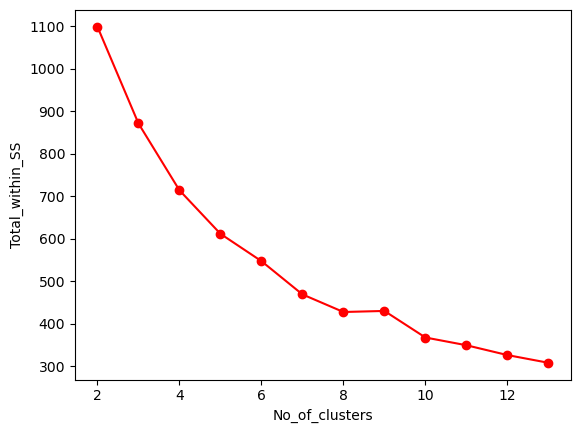

In [173]:
plt.plot(k,SST,'ro-')
plt.xlabel("No_of_clusters")
plt.ylabel("Total_within_SS")

model=KMeans(n_clusters=3)
model.fit(final1)
model.labels_
mb=pd.Series(model.labels_)
final['clust1']=mb

final.clust.value_counts()

final.clust1.value_counts()

In [176]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete').fit(df_norm)

h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)

pharma['clust']=cluster_labels

pharma=pharma.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

pharma.clust.value_counts()


clust
0    133
1    101
2     69
Name: count, dtype: int64

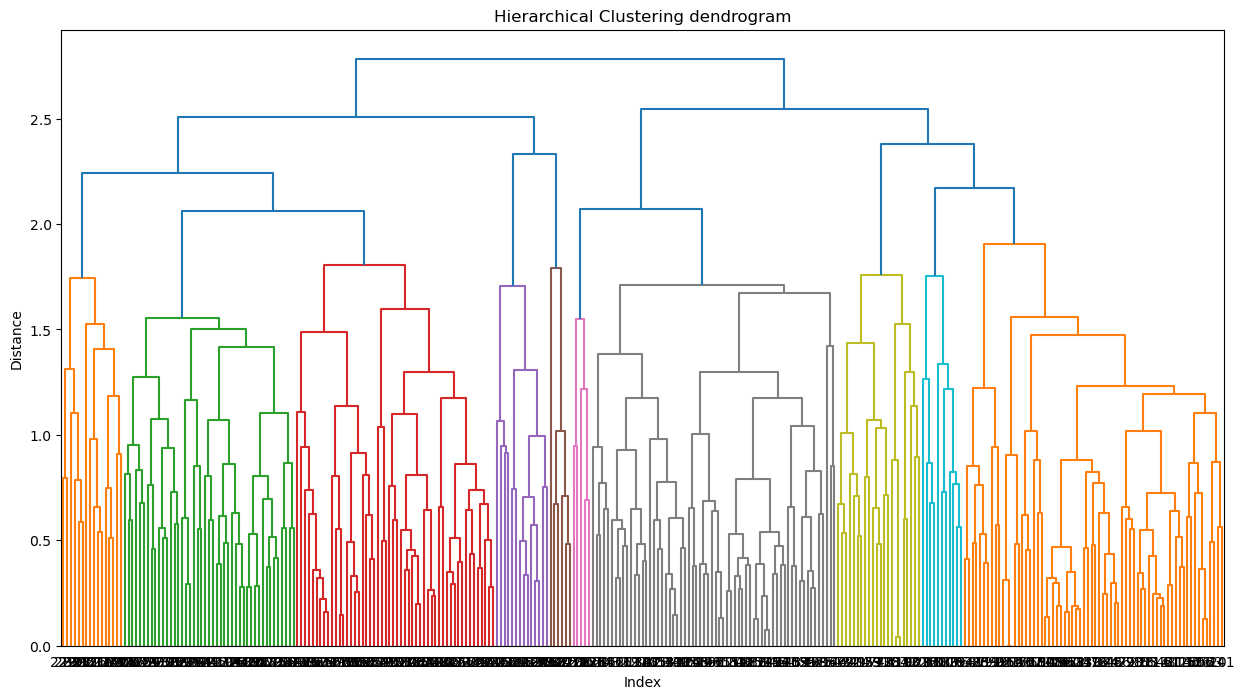

In [178]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_norm,method="complete",metric="euclidean")
plt.figure(figsize=(15,8));plt.title("Hierarchical Clustering dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [180]:
final.clust1.value_counts()

clust1
1    112
2    111
0     80
Name: count, dtype: int64